# **Week 4: Colab Experiment**

# I. Introduction
In this exercise, we load the Breast cancer wisconsin dataset for classification.

# II. Methods

In [24]:
from sklearn.datasets import load_breast_cancer
# import pandas as pd
# from collections import Counter
# from datetime import datetime
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import zero_one_loss

import matplotlib.pyplot as plt
from sklearn import tree

In [25]:
# Define the dependent and independent variables.
data = load_breast_cancer()
Y = data.target
X = data.data

In [26]:
# Create CV folds
num_folds = 5
kf = KFold(n_splits=num_folds, random_state=0, shuffle=True)
kfold_indices = {}

for i, (train_index, test_index) in enumerate(kf.split(X)):
  kfold_indices[f"fold_{i}"] = {'train': train_index, 'test': test_index}

c:\Users\codeamon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


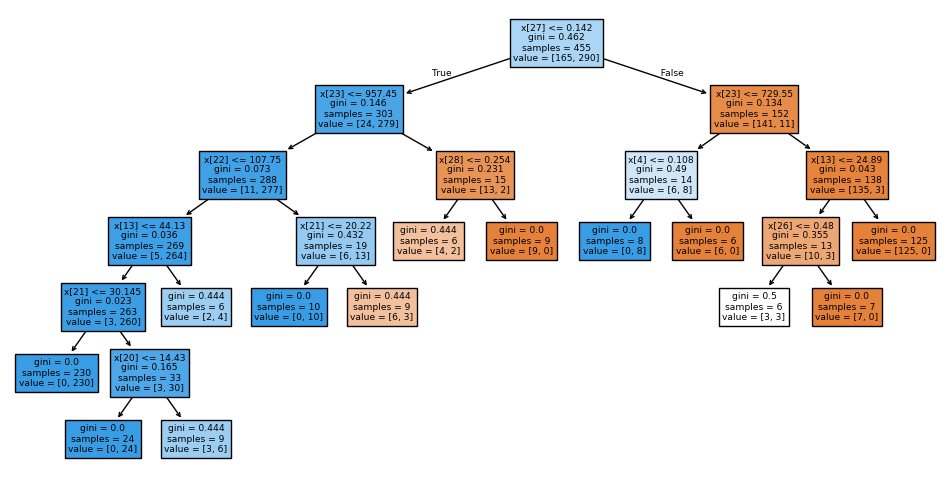

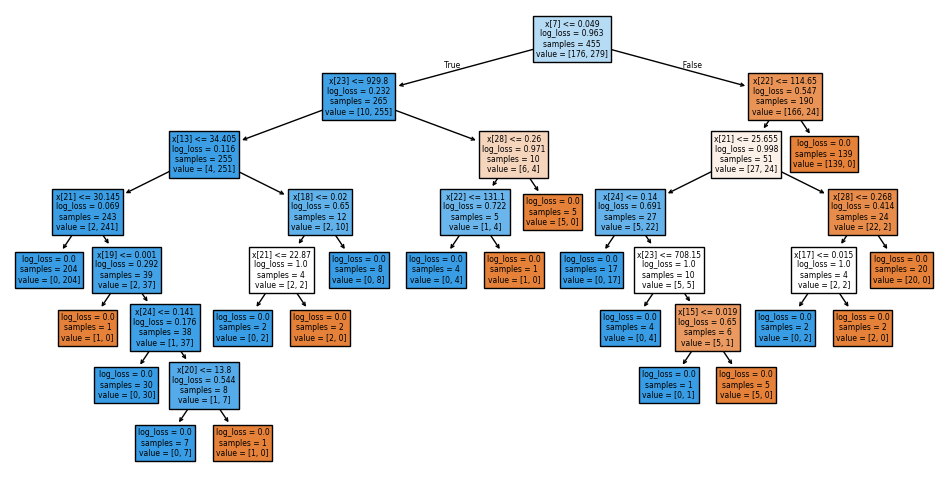

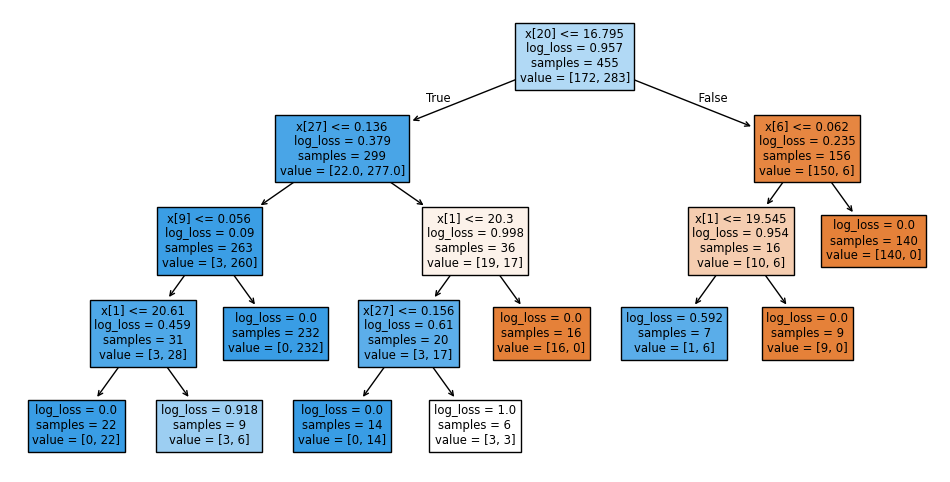

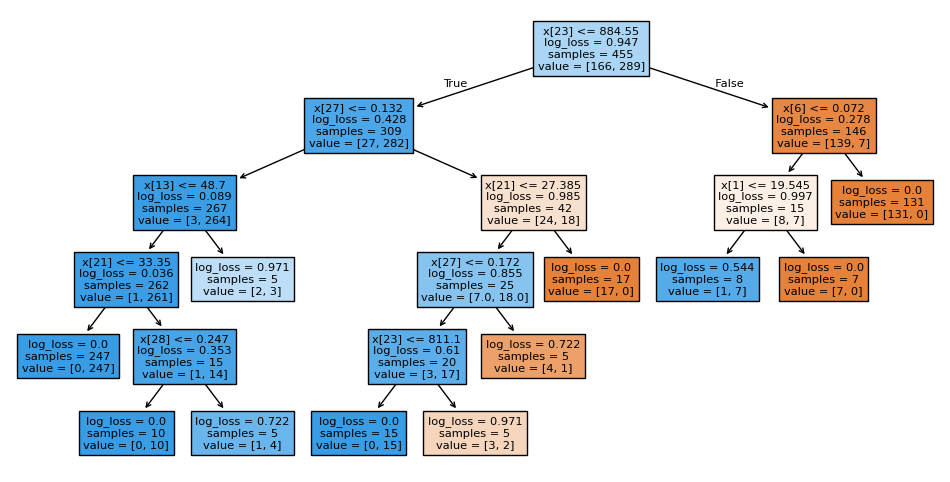

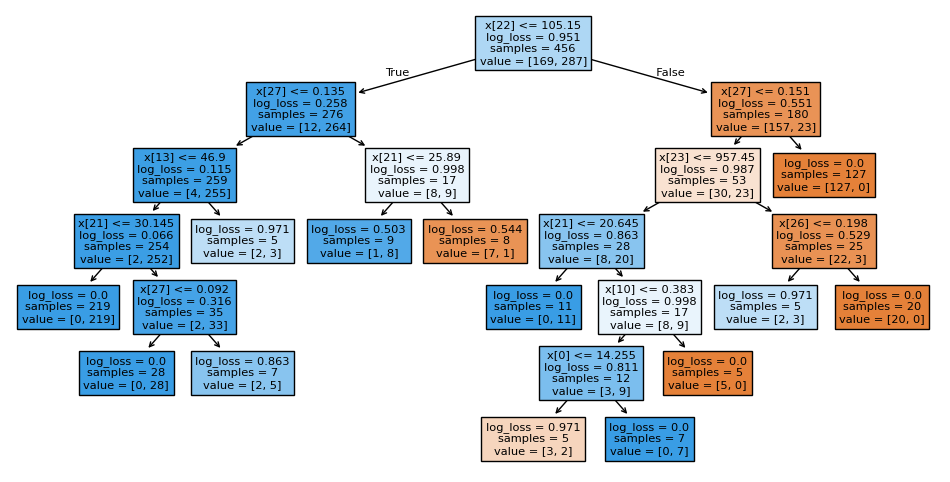

In [27]:
# Train models and apply them to the test set

Error_rate = {'logreg': [], 'svm': [], 'decision_tree': []}

for fold_id in range(num_folds):
    X_train = X[kfold_indices[f"fold_{fold_id}"]['train']]
    Y_train = Y[kfold_indices[f"fold_{fold_id}"]['train']]
    X_test = X[kfold_indices[f"fold_{fold_id}"]['test']]
    Y_test = Y[kfold_indices[f"fold_{fold_id}"]['test']]

    # Logistic regression
    ######################## TODO #####################################

    pipe_logistic = Pipeline([('scaler', StandardScaler()),
                              ('logistic',
                               LogisticRegression(penalty='l2',
                                                  class_weight='balanced'))])
    param_logistic = {
        # 'logistic__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'logistic__C': np.logspace(-1, 1, 100),
        # 'logistic__class_weight': ['dict ', 'balanced', 'None'],
        'logistic__solver':
        ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    }
    grid_search_logistic = GridSearchCV(pipe_logistic,
                                        param_logistic,
                                        scoring='accuracy',
                                        n_jobs=-1)
    grid_search_logistic.fit(X_train, Y_train)
    Y_pred_logistic = grid_search_logistic.predict(X_test)
    error_rate_logistic = zero_one_loss(Y_test, Y_pred_logistic)
    Error_rate['logreg'].append(error_rate_logistic)

    # print(
    #     f'Best logistic: {grid_search_logistic.best_params_} at fold {fold_id}'
    # )

    #####################################################################

    # SVM
    ######################## TODO #####################################

    pipe_svm = Pipeline([('scaler', StandardScaler()),
                         ('svm', SVC(class_weight='balanced'))])
    param_svm = {
        'svm__C': np.logspace(-1, 1, 100),
        'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        # 'svm__class_weight': ['dict', 'balanced', 'None'],
        # 'svm__gamma': ['auto', 'scale']
    }
    grid_search_svm = GridSearchCV(pipe_svm,
                                   param_svm,
                                   scoring='accuracy',
                                   n_jobs=-1)
    grid_search_svm.fit(X_train, Y_train)
    Y_pred_svm = grid_search_svm.predict(X_test)
    error_rate_svm = zero_one_loss(Y_test, Y_pred_svm)
    Error_rate['svm'].append(error_rate_svm)

    # print(f'Best svm: {grid_search_svm.best_params_} at fold {fold_id}')

    #####################################################################

    # Decision tree
    ######################## TODO #####################################

    pipe_d_tree = Pipeline([('decision_tree',
                             DecisionTreeClassifier(random_state=1216))])
    param_grid_d_tree = {
        'decision_tree__criterion': ['gini', 'log_loss'],
        'decision_tree__min_samples_leaf': np.arange(1, 10),
    }

    grid_search_d_tree = GridSearchCV(pipe_d_tree,
                                      param_grid_d_tree,
                                      scoring='accuracy',
                                      n_jobs=-1)
    grid_search_d_tree.fit(X_train, Y_train)
    Y_pred_d_tree = grid_search_d_tree.predict(X_test)
    error_rate_d_tree = zero_one_loss(Y_test, Y_pred_d_tree)
    Error_rate['decision_tree'].append(error_rate_d_tree)

    # print(
    #     f'Best decision tree: {grid_search_d_tree.best_params_} at fold {fold_id}'
    # )
    
    # plt.figure(figsize=(12,6))
    # tree.plot_tree(grid_search_d_tree.best_estimator_['decision_tree'],
    #                filled=True)
    # plt.savefig(f"decision_tree_{fold_id}.png")

    #####################################################################


## III. Results

Here we report the mean and standard deviation of the error rates over 5 folds for each method.

In [28]:
######################## TODO #####################################
print(f"The error rate over 5 folds in CV:")

# print the mean error rates and standard deviations
for model in Error_rate:
  print(f"{model}: mean = {round(np.mean(Error_rate[model]), 4)}, std = {round(np.std(Error_rate[model]), 4)}")
  
#####################################################################


The error rate over 5 folds in CV:
logreg: mean = 0.0263, std = 0.0124
svm: mean = 0.0246, std = 0.0129
decision_tree: mean = 0.0492, std = 0.0119


# IV. Conclusion and Discussion


1. Import python packages

2. Load the breast cancer dataset and assign it to the dependent and independent variables.

3. Process the KFold data following the official API documentation, and then store the results in a dictionary for future use.

4. Implement three three different models, including logistic regression (LR), support vector machine (SVM), and decision tree (DTree).

    In this experiment, we leverage the `sklearn.pipeline.Pipeline` to systematically preprocess our data through a series of transformations. Following this, we implement `GridSearchCV` to perform an exhaustive search across specified parameter ranges for various models, using accuracy as our scoring metric. To assess the performance of each model, we calculate the zero-one-loss during the K-Fold cross-validation process. Ultimately, we will summarize the performance of each model by computing the mean and standard deviation across the different K-Folds, which will serve as crucial indicators of model effectiveness.

    Both logistic regression and support vector machines (SVM) employ StandardScaler to standardize input features. The process of hyperparameter tuning generally follows a structured approach. Initially, we conduct a comprehensive search across the full parameter space, followed by identifying and adjusting specific parameters that are either well-known or consistent throughout all K-fold cross-validation iterations. Finally, we focus on fine-tuning the remaining hyperparameters within a designated range to optimize model performance.

5. Conclusions and discussions.

    In conclusion, the cross-validation results indicate that the logistic regression model (logreg) achieved a mean error rate of `0.0263` with a standard deviation of `0.0124`, demonstrating its reliability and consistent performance across the folds. The support vector machine (svm) model showed a slightly lower mean error rate of `0.0246`, albeit with a higher standard deviation of `0.0129`, suggesting a competitive yet less stable performance compared to logreg. In contrast, the decision tree model exhibited the highest mean error rate at `0.0492`, accompanied by a standard deviation of `0.0119`, indicating a lower variability in its performance and suggesting that it may not generalize as effectively as the other models. Overall, the results highlight the superior accuracy and stability of the logistic regression and support vector machine models relative to the decision tree, and the support vector machine has a highest accuracy.

    Moreover, in the context of model training and hyperparameter tuning, two distinct scenarios occurred. One is characterized by a lower mean error rate but a higher standard deviation, and the other is marked by a higher mean error rate with a lower standard deviation. The first situation suggests a model that, on average, performs well but exhibits significant variability across different data subsets, indicating sensitivity to specific features or noise. Conversely, the second scenario reflects a more consistent model performance across various conditions, albeit with a generally poorer accuracy. Understanding these dynamics of the evaluations is crucial for balancing robustness and reliability in predictive modeling.
